#The Breast Canser Data set#

###Data Cleaning and processing###



```
# This is formatted as code
```

Importing the Libraries

In [ ]:
# Commented out IPython magic to ensure Python compatibility.
import numpy as np
np.set_printoptions(threshold=np.inf)
#the output of plotting commands is displayed inline within frontends
import matplotlib.pyplot as plt
from IPython.core.debugger import set_trace         #for debugging 
import pandas as pd
#it is important to set the seed for reproducibility as it initializes the random number generator
np.random.seed(1234)

Uplaod the Data BC


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving breast_cancer_wisconsin.csv to breast_cancer_wisconsin (3).csv


Cleaning the Data and reduce ? and string inputs

In [ ]:
datasetBC=pd.read_csv('breast_cancer_wisconsin.csv')
datasetBC = pd.DataFrame(datasetBC)
# Getting rid of ? and strings
datasetBC = datasetBC[~datasetBC.eq('?').any(1)]
datasetBC['Bare_Nuclei'] = datasetBC['Bare_Nuclei'].astype(int)

# Tranfer to numpy arrays
cleanData = datasetBC.to_numpy()

Finding Data mean, STD, max, min, and correlation

In [ ]:
x = cleanData[:,1:10]
y = cleanData[:,10]

# Transfer the classes from 2, 4 to 0,1
for i in range(0,y.shape[0]):
  if y[i] == 2:
    y[i] = 0
  elif y[i] == 4:
    y[i] = 1


xMeans = np.mean(x, axis=0)
xSTD = np.std(x, axis=0)
yMean = np.mean(y)
xMax = np.max(x,axis = 0)
xMin = np.min(x,axis = 0)
correlations = np.zeros(9)
for i in range(x[1,:].shape[0]):
    correlations[i] = np.corrcoef(x[:,i], y)[1,0]

features = np.array(['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'])
measures = np.array(['Means', 'STD', 'Max', 'Min', 'Correlation'])
dataProperties = (xMeans, xSTD, xMax, xMin, correlations)
pd.DataFrame(dataProperties, measures, features)


,Clump_Thickness,Uniformity_of_Cell_Size,Uniformity_of_Cell_Shape,Marginal_Adhesion,Single_Epithelial_Cell_Size,Bare_Nuclei,Bland_Chromatin,Normal_Nucleoli,Mitoses
Means,4.442167,3.150805,3.215227,2.830161,3.234261,3.544656,3.445095,2.869693,1.603221
STD,2.818696,3.062900,2.986392,2.862464,2.221457,3.641189,2.447903,3.050431,1.731405
Max,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
Min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
Correlation,0.714790,0.820801,0.821891,0.706294,0.690958,0.822696,0.758228,0.718677,0.423448


The correlation shows that **Uniformity Uniformity_of_Cell_Size** and **Uniformity_of_Cell_Shape** are the most important features to demonstrate. They have the highest correlation values.
features = 0,1,2,3,4,5,6,7,8
Therefore features = 1 and 2 are the best

We are using Random Forest Classifier as a confirmaiton of correlation test

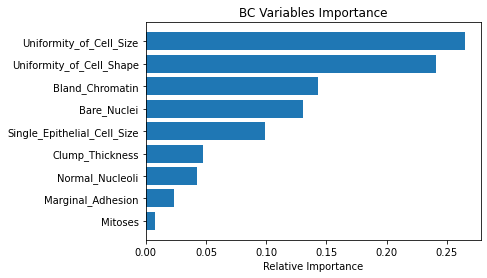

In [ ]:
from sklearn.ensemble import RandomForestClassifier
features = np.array(['Clump_Thickness','Uniformity_of_Cell_Size','Uniformity_of_Cell_Shape','Marginal_Adhesion','Single_Epithelial_Cell_Size','Bare_Nuclei','Bland_Chromatin','Normal_Nucleoli','Mitoses'])
clf = RandomForestClassifier()
clf.fit(datasetBC[features], datasetBC.iloc[:,10])
# from the calculated importances, order them from most to least important
# and make a barplot so we can visualize what is/isn't important
importances = clf.feature_importances_
sorted_idx = np.argsort(importances)

padding = np.arange(len(features)) + 0.5
plt.barh(padding, importances[sorted_idx], align='center')
plt.yticks(padding, features[sorted_idx])
plt.xlabel("Relative Importance")
plt.title("BC Variables Importance")
plt.show()

As we can see from the presented graph, radnom forest classifier shows as the same result as the correlation test. **Uniformity_of_Cell_Size** and **Uniformity_of_Cell_Shape** are the most important features

 We are also showing the distribution of all features including the classes as well on a scale of [0-1] as a way to compare featuers' distribution with class distribution

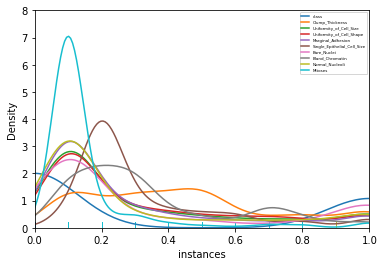

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import seaborn as sns

df = pd.DataFrame(datasetBC)
df = df[~df.eq('?').any(1)]
df = df.iloc[:,0:11].astype(float) 

sns.distplot(y, hist=False, rug=True, label="class")
sns.distplot(df[df.columns[1]]/(df[df.columns[1]].max()), hist=False, rug=True, label="Clump_Thickness")
sns.distplot(df[df.columns[2]]/(df[df.columns[2]].max()), hist=False, rug=True, label="Uniformity_of_Cell_Size")
sns.distplot(df[df.columns[3]]/(df[df.columns[3]].max()), hist=False, rug=True, label="Uniformity_of_Cell_Shape")
sns.distplot(df[df.columns[4]]/(df[df.columns[4]].max()), hist=False, rug=True, label="Marginal_Adhesion")

sns.distplot(df[df.columns[5]]/(df[df.columns[5]].max()), hist=False, rug=True, label="Single_Epithelial_Cell_Size")
sns.distplot(df[df.columns[6]]/(df[df.columns[6]].max()), hist=False, rug=True, label="Bare_Nuclei")

sns.distplot(df[df.columns[7]]/(df[df.columns[7]].max()), hist=False, rug=True, label="Bland_Chromatin")

sns.distplot(df[df.columns[8]]/(df[df.columns[8]].max()), hist=False, rug=True, label="Normal_Nucleoli")

sns.distplot(df[df.columns[9]]/(df[df.columns[9]].max()), hist=False, rug=True, label="Mitoses")

plt.ylim(0, 8)
plt.xlim(0, 1)
plt.xlabel("instances")

plt.legend(fontsize=4)

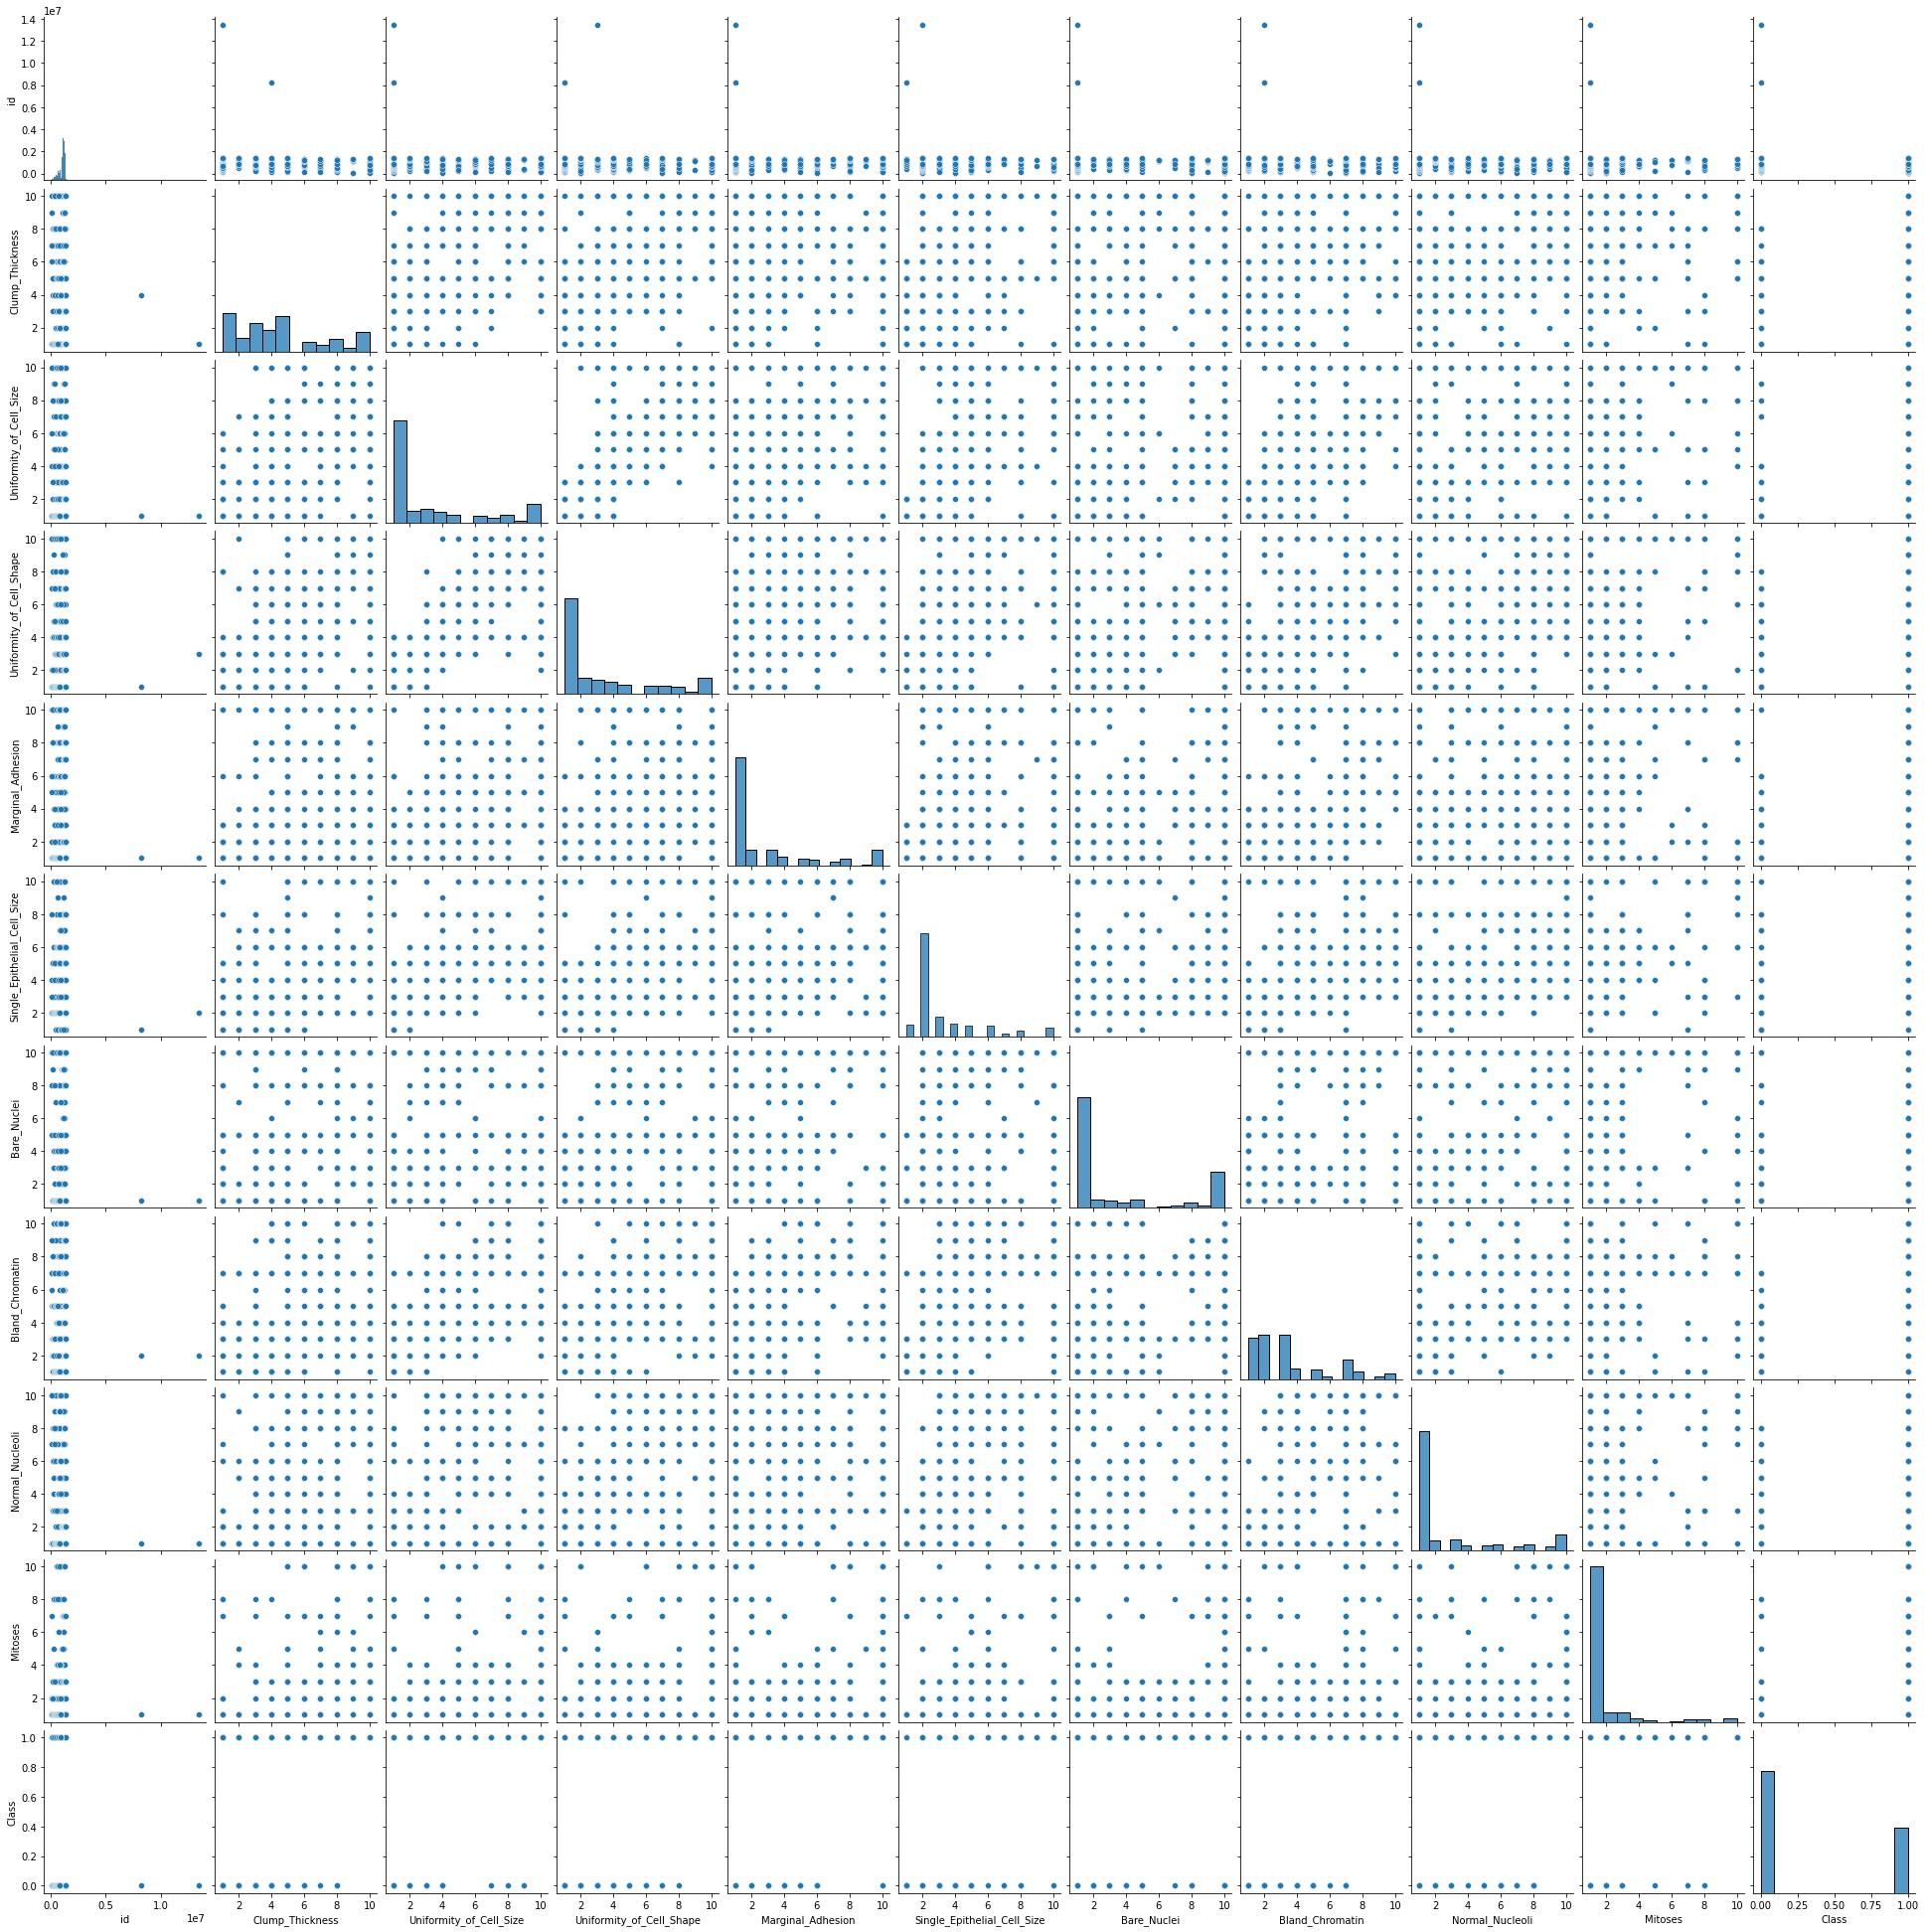

In [ ]:
import seaborn as sns
sns.pairplot(df)

You can visualize the data distribution for all features. The above graphs proves the two previous tests.

#KNN Algorithm#
Using KNN on all features to process the data. We are using help from the lecture's code.

In [ ]:
#define the metric we will use to measure similarity
#if the input shapes are [1,N1,F] and [N2,1,F] then output shape is [N2,N1]
#as numpy supports broadcasting with arithmetic operations
#for more on numpy broadcasting refer to: https://numpy.org/doc/stable/user/basics.broadcasting.html   
euclidean = lambda x1, x2: np.sqrt(np.sum((x1 - x2)**2, axis=-1))
manhattan = lambda x1, x2: np.sum(np.abs(x1 - x2), axis=-1)
#Cosine Similarity
hamming = lambda x1, x2: np.count_nonzero((x1!=x2), axis=-1)
cosine = lambda x1, x2:  (cosine_similarity(x1, x2))

def cosine_similarity(a, b):
        norm_a = np.linalg.norm(a)
        norm_b = np.linalg.norm(b)
        aa = a.squeeze()
        bb = a.squeeze()
        prod = np.dot(aa, bb.T)
        #dot = np.dot(vec_a.T, vec_b)
        #print("vec_a, vec_b",a.shape, b.shape)
        #dot = sum(a * b for a, b in zip(vec_a, vec_b))
        #print("dot / (norm_a * norm_b):", norm_a * norm_b )
        return prod / (norm_a * norm_b)


In [ ]:
class KNN:

    def __init__(self, K=1, dist_fn= euclidean):
        self.dist_fn = dist_fn
        self.K = K
        return
    
    def fit(self, x, y):
        ''' Store the training data using this method as it is a lazy learner'''
        self.x = x
        self.y = y
        self.C = np.max(y) + 1
        return self
    
    def predict(self, x_test):
        ''' Makes a prediction using the stored training data and the test data given as argument'''
        num_test = x_test.shape[0]
        #calculate distance between the training & test samples and returns an array of shape [num_test, num_train]
        distances = self.dist_fn(self.x[None,:,:], x_test[:,None,:])
        #ith-row of knns stores the indices of k closest training samples to the ith-test sample 
        knns = np.zeros((num_test, self.K), dtype=int)
        #ith-row of y_prob has the probability distribution over C classes
        y_prob = np.zeros((num_test, self.C))
        for i in range(num_test):
            knns[i,:] = np.argsort(distances[i])[:self.K]
            y_prob[i,:] = np.bincount(self.y[knns[i,:]], minlength=self.C) #counts the number of instances of each class in the K-closest training samples
        #y_prob /= np.sum(y_prob, axis=-1, keepdims=True)
        #simply divide by K to get a probability distribution
        y_prob /= self.K
        return y_prob, knns

##Bulding the training, validation, and test sets##

In [ ]:
#print the feature shape and classes of dataset 
(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
num_instances = N

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

#Set the validation and test set
divider = 10
n_test, n_valid = num_instances // divider, num_instances // divider
#permute the data
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_valid, y_valid = x[inds[n_test:n_test+n_valid]], y[inds[n_test:n_test+n_valid]]
x_train, y_train = x[inds[n_test+n_valid:]], y[inds[n_test+n_valid:]]                                    #generates an indices array from 0 to N-1 and permutes it 



instances (N) 	 683 
 features (D) 	 9 
 classes (C) 	 2


##Mean Square Error per each K##
The result of our KNN algorithm

test,valid,train: 68 68 547 683


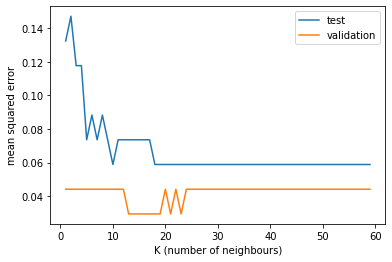

In [ ]:
from sklearn import neighbors
#Plot the mean square error for different K values stored in K_list
K_list = range(1,60)
err_train, err_test, err_valid = [], [], []
for i, K in enumerate(K_list):
    model = KNN(K=K, dist_fn= euclidean)

    y_prob_train, knns_train = model.fit(x_train, y_train).predict(x_train)
    y_pred_train = np.argmax(y_prob_train,axis=-1)
    
    y_prob_valid, knns_valid = model.fit(x_train, y_train).predict(x_valid)
    y_pred_valid = np.argmax(y_prob_valid,axis=-1)
    
    y_prob_test, knns_test = model.fit(x_train, y_train).predict(x_test)
    y_pred_test = np.argmax(y_prob_test,axis=-1)
    
    # use the loss function to find error
    err_train.append(loss(y_pred_train, y_train))
    err_valid.append(loss(y_pred_valid, y_valid))
    err_test.append(loss(y_pred_test, y_test))
print("test,valid,train:",x_test.shape[0], x_valid.shape[0], x_train.shape[0] , num_instances)    
plt.plot(K_list, err_test,  label='test')
#plt.plot(K_list, err_train,  label='train')
plt.plot(K_list, err_valid, label='validation')

plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

The result of Neighbors algorithm. As you can see the result is almost similar to our findings. Although it is smoother.



test,valid,train: 68 68 547 683


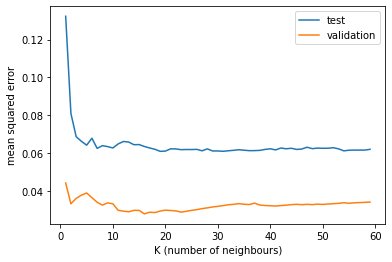

In [ ]:
from sklearn import neighbors
#Plot the mean square error for different K values stored in K_list
K_list = range(1,60)
err_train, err_test, err_valid = [], [], []
for i, K in enumerate(K_list):
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model = model.fit(x_train, y_train)
    err_test.append(loss(model.predict(x_test), y_test))
    err_valid.append(loss(model.predict(x_valid), y_valid))
    err_train.append(loss(model.predict(x_train), y_train))
print("test,valid,train:",x_test.shape[0], x_valid.shape[0], x_train.shape[0] , num_instances)    
plt.plot(K_list, err_test,  label='test')
#plt.plot(K_list, err_train,  label='train')
plt.plot(K_list, err_valid, label='validation')

plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

##Cross Validation##
The result of our KNN algorithm for cross validation

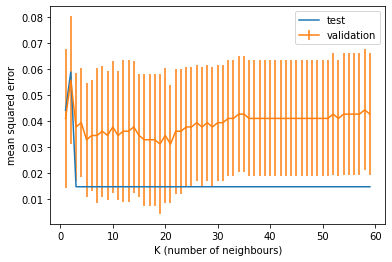

The simplest model with lowest validation error: k =  19


In [ ]:
def cross_validate(n, n_folds=10):
    #get the number of data samples in each split
    n_val = n // n_folds
    inds = np.random.permutation(n)
    inds = []
    for f in range(n_folds):
        tr_inds = []
        #get the validation indexes
        val_inds = list(range(f * n_val, (f+1)*n_val))
        #get the train indexes
        if f > 0:
            tr_inds = list(range(f*n_val))
        if f < n_folds - 1:
            tr_inds = tr_inds + list(range((f+1)*n_val, n))
        #The yield statement suspends function’s execution and sends a value back to the caller
        #but retains enough state information to enable function to resume where it is left off
        yield tr_inds, val_inds
########################################
inds = np.random.permutation(num_instances)
#seperate the test data
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test
########################################
num_folds = 10
err_test, err_valid = np.zeros(len(K_list)), np.zeros((len(K_list), num_folds))
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = KNN(K=K, dist_fn= euclidean)
        y_prob_rest, knns_train = model.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = loss(y_rest[val], y_pred_rest)
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    model = KNN(K=K, dist_fn= euclidean)
    y_prob_rest, knns_train = model.fit(x_rest, y_rest).predict(x_test)
    y_pred_test = np.argmax(y_prob_rest,axis=-1)
    err_test[i]= loss(y_test, y_pred_test)
    
plt.plot(K_list, err_test,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

# finding the best K for the model
validErrors = np.mean(err_valid, axis=1)
minKs = np.where(validErrors==min(validErrors))
print("The simplest model with lowest validation error: k = ", minKs[0][0]+1)
# we add one because the indexes start from 0


The result of Neighbors algorithm for cross validation. As you can see the result is almost similar to our findings. Although it is smoother.

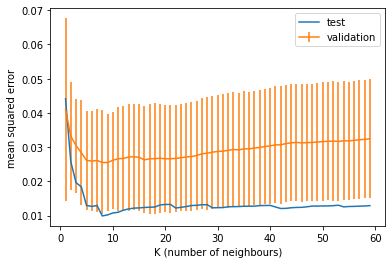

validErrors: [0.04098361 0.03319672 0.03041894 0.02838115 0.02609836 0.02591075
 0.02609568 0.0255123  0.02548067 0.02613115 0.02659531 0.0266735
 0.02710253 0.02715791 0.02703097 0.02627433 0.02656418 0.02661911
 0.02674265 0.02658607 0.02658637 0.02669354 0.02687409 0.02712318
 0.02723148 0.02754147 0.02803976 0.02821596 0.02851601 0.02873588
 0.02881902 0.02904553 0.02929895 0.02919337 0.02947876 0.0294791
 0.0297453  0.02988738 0.03017859 0.03038012 0.03063848 0.03066615
 0.0310376  0.03125931 0.0313556  0.03124051 0.03128706 0.03136954
 0.03148688 0.0315941  0.03171227 0.03174168 0.03165703 0.03184522
 0.03180111 0.03199283 0.03214406 0.0322674  0.03243556]
The simplest model with lowest validation error: k =  9


In [ ]:
for i, K in enumerate(K_list):
    #Find the validation errors for num_folds splits for a given K
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        model = neighbors.KNeighborsRegressor(n_neighbors=K)
        model = model.fit(x_rest[tr], y_rest[tr])
        err_valid[i, f] = loss(y_rest[val], model.predict(x_rest[val]))
    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    model = neighbors.KNeighborsRegressor(n_neighbors=K)
    model = model.fit(x_rest, y_rest)
    err_test[i]= loss(y_test, model.predict(x_test))
    
plt.plot(K_list, err_test,  label='test')
plt.errorbar(K_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('K (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

validErrors = np.mean(err_valid, axis=1)
print("validErrors:",validErrors)
minKs = np.where(validErrors==min(validErrors))
print("The simplest model with lowest validation error: k = ", minKs[0][0]+1)
# we add one because the indexes start from 0
best_K = minKs[0][0]+1


###Note:### 
As you can see the result from the Neighbors library is almost similar to our algorithm. However, the result is a little different because this graph is smoother. We choose the best K from Neighbors library becuase the answer is more accurate.

**##Knowing the best K, we start our KNN algorithm using all features##

In [ ]:
def evaluate_acc(y_pred, y_true):
  accuracy = np.sum(y_pred == y_true)/y_true.shape[0]
  return accuracy

Running KNN using Euclidean Function

In [ ]:
print("The result using Euclidean Function")
model = KNN(K=best_K, dist_fn= euclidean)

y_prob, knns = model.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_train)
print(f'accuracy on Training set for K=3 is {accuracy*100:.1f} .')

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_test)
print(f'accuracy on Test set for K=3 is {accuracy*100:.1f} .')
print(best_K)


The result using Euclidean Function
accuracy on Training set for K=3 is 97.6 .
accuracy on Test set for K=3 is 98.5 .
9


Running KNN using Function Manhattan

In [ ]:
print("The result using Manhattan Function")
model = KNN(K=best_K, dist_fn= manhattan)

y_prob, knns = model.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_train)
print(f'accuracy on Training set for K=3 is {accuracy*100:.1f} .')

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_test)
print(f'accuracy on Test set for K is {accuracy*100:.1f} .')

The result using Manhattan Function
accuracy on Training set for K=3 is 97.8 .
accuracy on Test set for K=3 is 98.5 .


In [ ]:
print("The result using Hamming Function")
model = KNN(K=best_K, dist_fn= hamming)

y_prob, knns = model.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_train)
print(f'accuracy on Training set for K=3 is {accuracy*100:.1f} .')

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_test)
print(f'accuracy on Test set for K is {accuracy*100:.1f} .')

The result using Hamming Function
accuracy on Training set for K=3 is 96.3 .
accuracy on Test set for K=3 is 100.0 .


In [ ]:
print("The result using cosine similarity Function")
model = KNN(K=best_K, dist_fn= cosine)

y_prob, knns = model.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_train)
print(f'accuracy on Training set for K is {accuracy*100:.1f} .')

y_prob, knns = model.fit(x_train, y_train).predict(x_test)
#To get hard predictions by choosing the class with the maximum probability
y_pred = np.argmax(y_prob,axis=-1)
accuracy = evaluate_acc(y_pred, y_test)
print(f'accuracy on Test set for K is {accuracy*100:.1f} .')

The result using cosine similarity Function
accuracy on Training set for K=3 is 66.2 .
accuracy on Test set for K=3 is 72.1 .


###Testing a range of Ks over accuracy###

Text(0.5, 1.0, 'Maximum Accuracy over test set = 1')

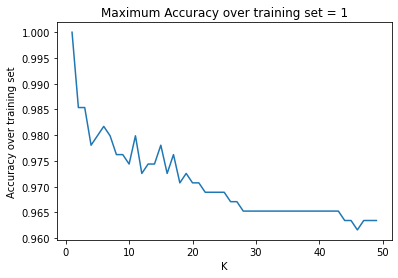

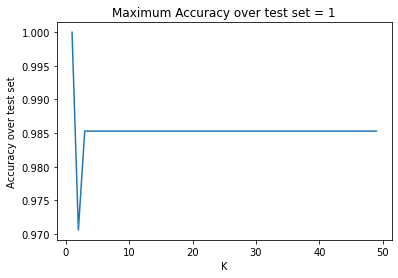

In [ ]:
#calculating accuracy accros different K values
accTrain = []
accTest = []
kMaxAccTrain = 0
kMaxTrain = 0
kMaxAccTest = 0
kMaxTest = 0

maximumRange = 50
for k in range(1,maximumRange):
  model = KNN(K=k, dist_fn=euclidean)
  y_prob, knns = model.fit(x_train, y_train).predict(x_train)
  y_pred = np.argmax(y_prob,axis=-1)
  accuracyTrain = evaluate_acc(y_pred, y_train)

  y_prob, knns = model.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(y_prob,axis=-1)
  accuracyTest = evaluate_acc(y_pred, y_test)
  accTrain.append(accuracyTrain)
  accTest.append(accuracyTest)
  
  if kMaxAccTrain<accuracyTrain:
      kMaxAccTrain = accuracyTrain
      kMaxTrain = k
  if kMaxAccTest<accuracyTest:
      kMaxAccTest = accuracyTest
      kMaxTest = k

plt.figure(1)
plt.plot(range(1,maximumRange), accTrain)
plt.xlabel('K')
plt.ylabel('Accuracy over training set')
plt.title("Maximum Accuracy over training set = " + str(kMaxTrain))

plt.figure(2)
plt.plot(range(1,maximumRange), accTest)
plt.xlabel('K')
plt.ylabel('Accuracy over test set')
plt.title("Maximum Accuracy over test set = " + str(kMaxTest))


Now we draw the decision boundries according to the model

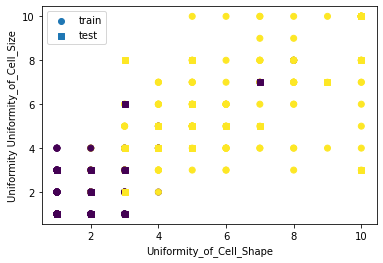

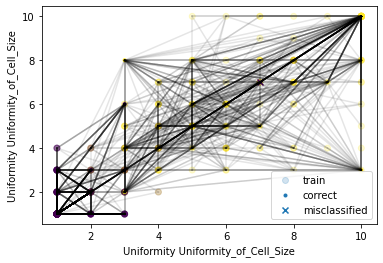

In [ ]:
#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)

#visualization of the data
feat1 = 1
feat2 = 2
nameFeat1 = "Uniformity Uniformity_of_Cell_Size"
nameFeat2 = "Uniformity_of_Cell_Shape"
xPlot_train = x_train[:,[feat1,feat2]]
xPlot_test = x_test[:,[feat1,feat2]]
plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train, marker='o', label='train')
plt.scatter(xPlot_test[:,0], xPlot_test[:,1], c=y_test, marker='s', label='test')
plt.legend()
plt.ylabel(nameFeat1)
plt.xlabel(nameFeat2)
plt.show()


#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)
#visualization of the points
plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(xPlot_test[correct,0], xPlot_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(xPlot_test[incorrect,0], xPlot_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')

#connect each node to k-nearest neighbours in the training set
for i in range(xPlot_test.shape[0]):
    for k in range(model.K):
        hor = xPlot_test[i,0], xPlot_train[knns[i,k],0]
        ver =xPlot_test[i,1], xPlot_train[knns[i,k],1]
        plt.plot(hor, ver, 'k-', alpha=.1)
    
plt.ylabel(nameFeat1)
plt.xlabel(nameFeat1)
plt.legend()
plt.show()

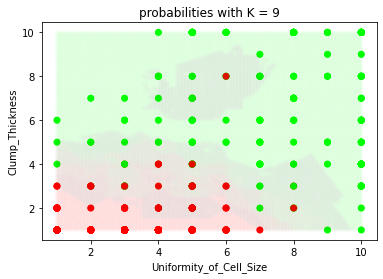

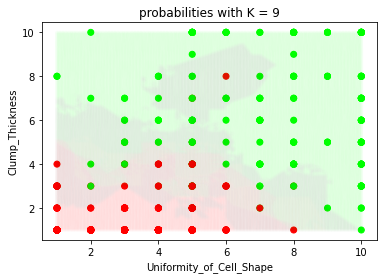

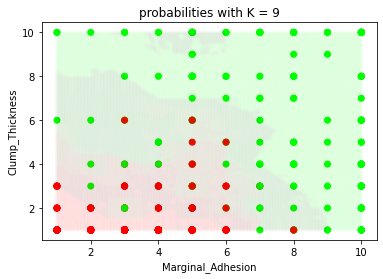

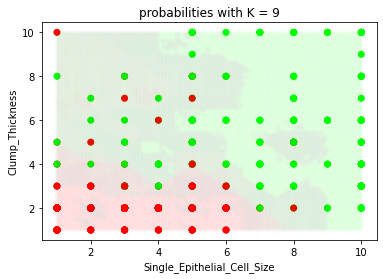

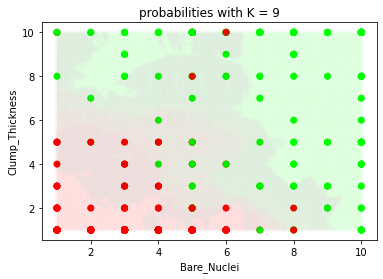

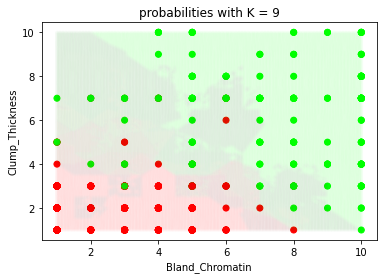

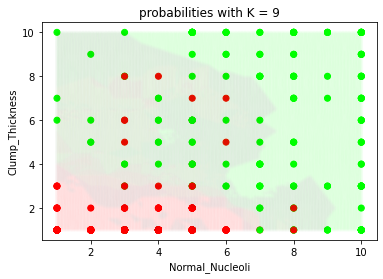

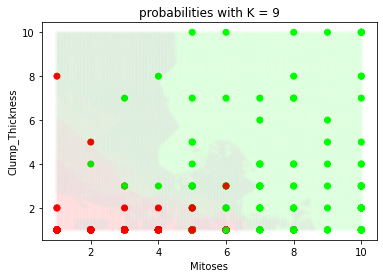

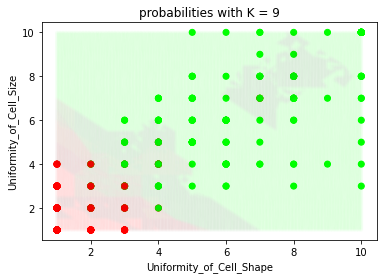

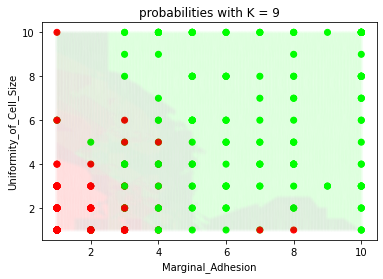

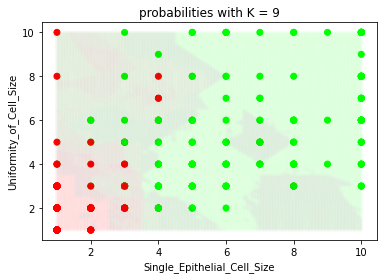

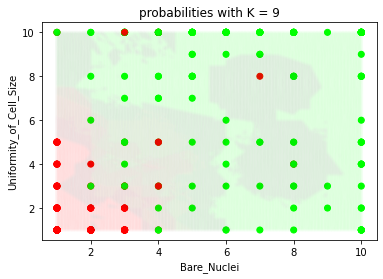

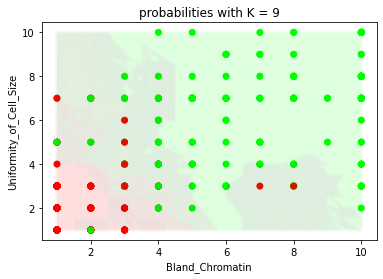

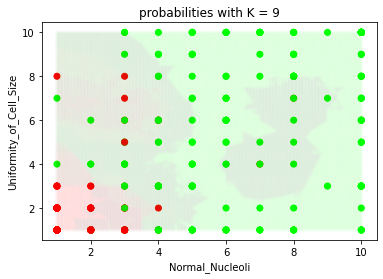

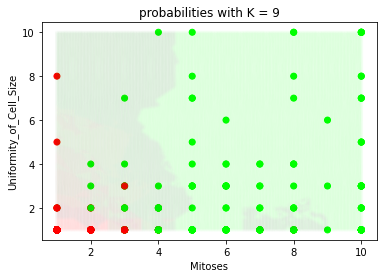

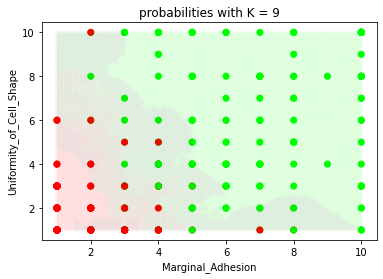

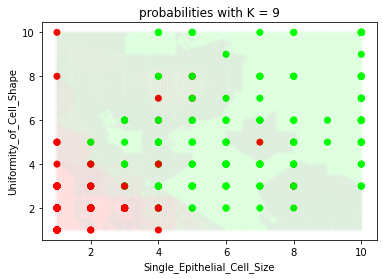

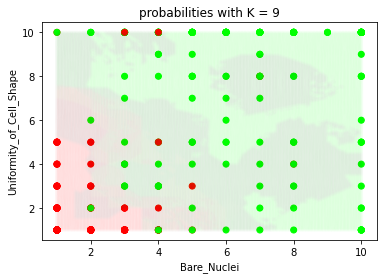

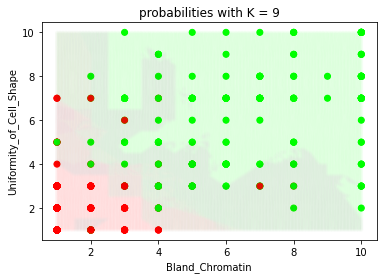

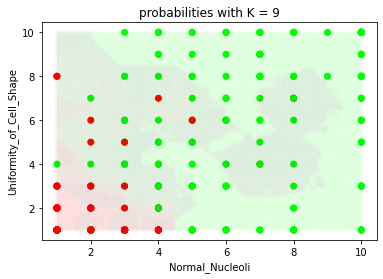

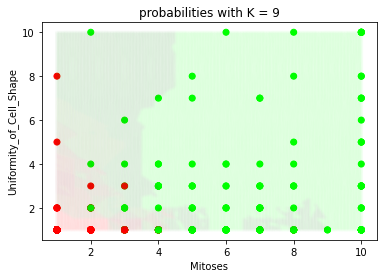

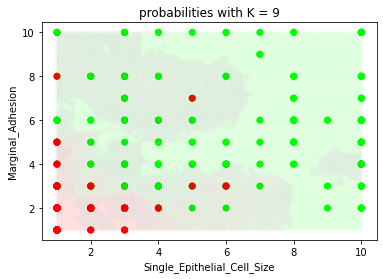

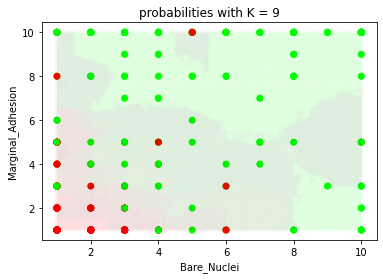

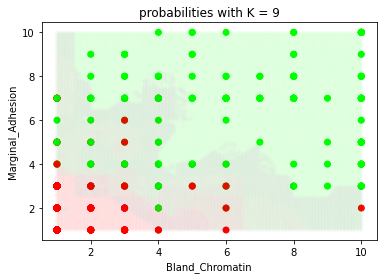

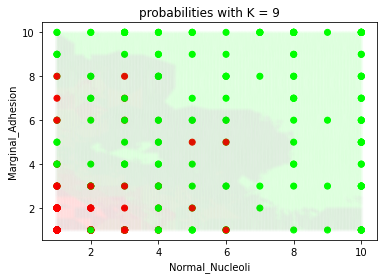

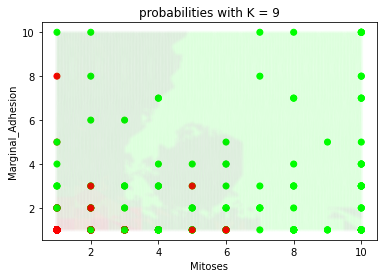

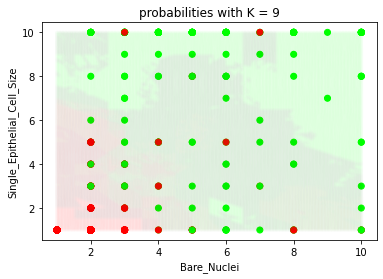

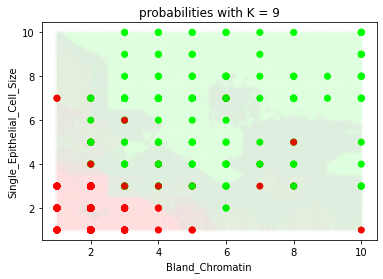

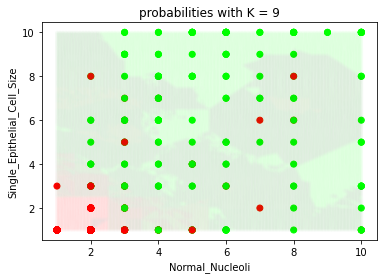

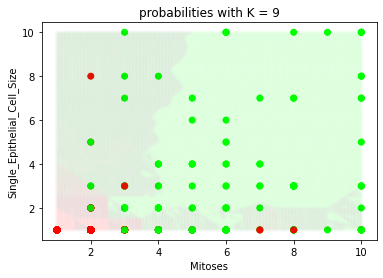

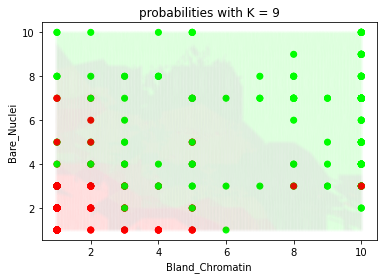

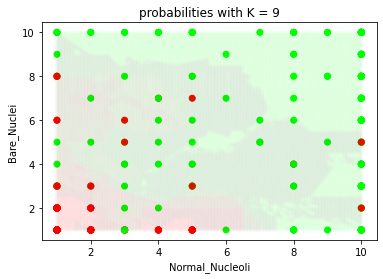

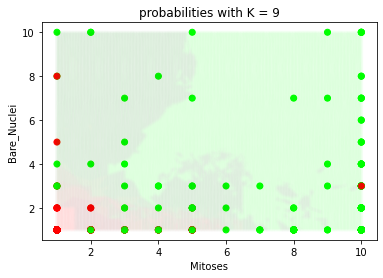

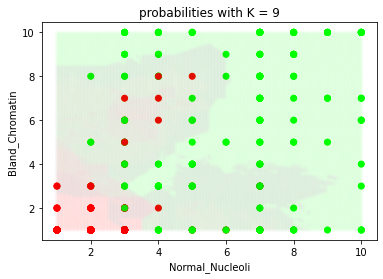

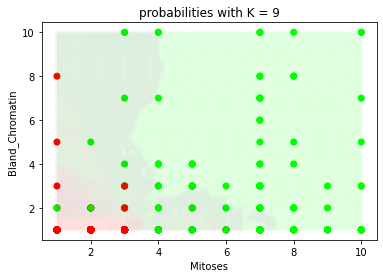

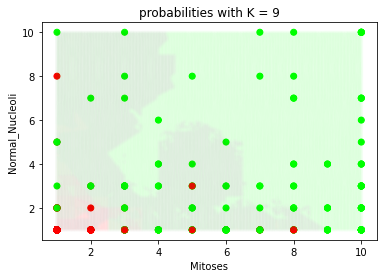

In [ ]:
for rows in range(features.shape[0]):
  for cols in range(rows+1, features.shape[0]):
    correct = y_test == y_pred
    incorrect = np.logical_not(correct)
    #visualization of the data
    feat1 = rows
    feat2 = cols
    nameFeat1 = features[rows]
    nameFeat2 = features[cols]
    xPlot_train = x_train[:,[feat1,feat2]]
    xPlot_test = x_test[:,[feat1,feat2]]
    #we can make the grid finer by increasing the number of samples from 200 to higher value
    # Choosing the second and third column in the x matrix <============
    x0v = np.linspace(np.min(x[:,rows]), np.max(x[:,rows]), 200)
    x1v = np.linspace(np.min(x[:,cols]), np.max(x[:,cols]), 200)
    #to features values as a mesh  
    x0, x1 = np.meshgrid(x0v, x1v)
    x_all = np.vstack((x0.ravel(),x1.ravel())).T
    
    model = KNN(K=best_K, dist_fn=euclidean)
    y_train_prob = np.zeros((y_train.shape[0], C))
    y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

    #to get class probability of all the points in the 2D grid
    y_prob_all, _ = model.fit(xPlot_train, y_train).predict(x_all)

    y_pred_all = np.zeros_like(y_prob_all)
    y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

    [a,b] = y_train_prob.shape
    y_train_prob_Color = np.zeros((a,b+1))
    y_train_prob_Color[:,:-1] = y_train_prob
    
    [a,b] = y_pred_all.shape
    y_pred_all_Color = np.zeros((a,b+1))
    y_pred_all_Color[:,:-1] = y_pred_all
    
    [a,b] = y_prob_all.shape
    y_prob_all_Color = np.zeros((a,b+1))
    y_prob_all_Color[:,:-1] = y_prob_all

    #We can also plot class probabilities (different values of probabilities take different colors)
    
    # axs[k,1].scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
    # axs[k,1].scatter(x_all[:,0], x_all[:,1], c=y_prob_all_Color, marker='.', alpha=.01)
    # axs[k,1].set(xlabel=nameFeat1, ylabel=nameFeat1)
    # axs[k, 1].set_title('probability with K = ' + str(k))
  
    
    plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
    plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_Color, marker='.', alpha=.01)
    plt.ylabel(nameFeat1)
    plt.xlabel(nameFeat2)
    plt.title('probabilities with K = ' + str(best_K))
    plt.show()



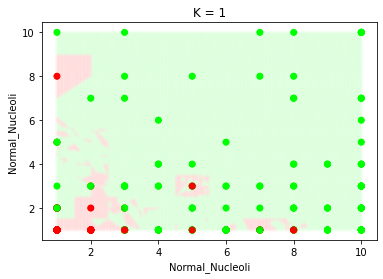

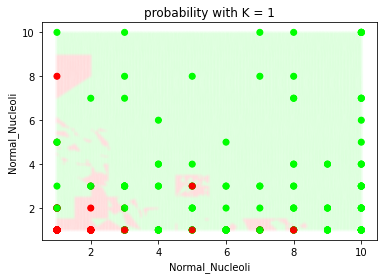

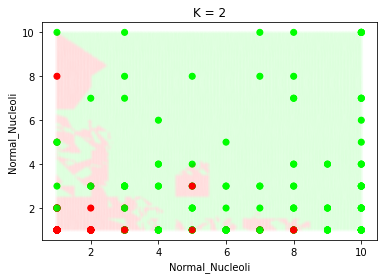

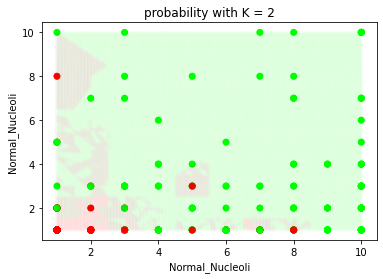

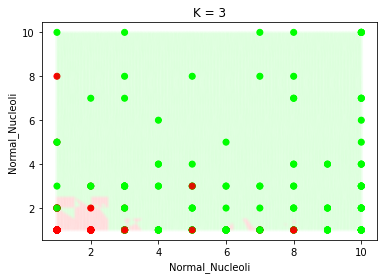

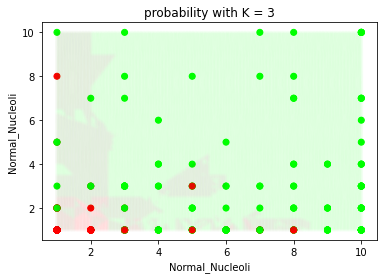

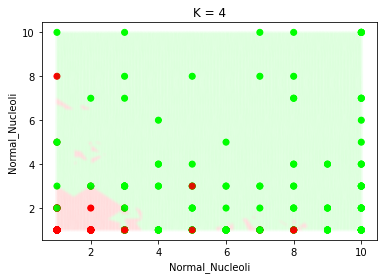

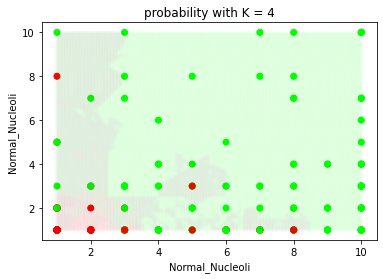

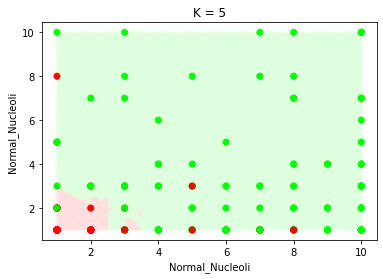

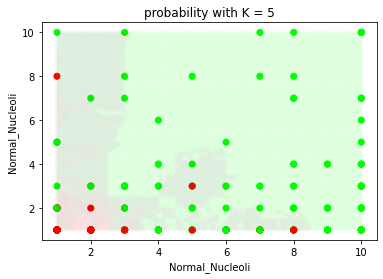

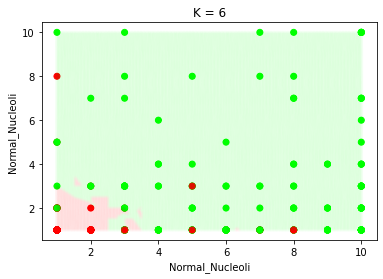

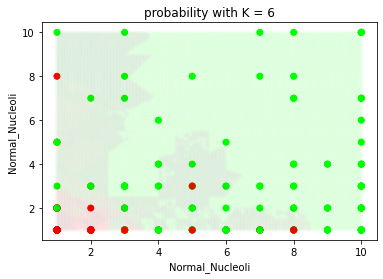

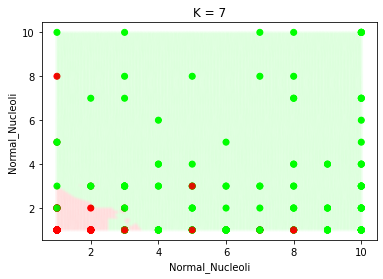

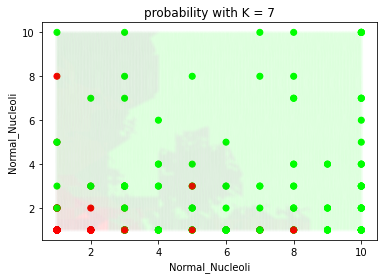

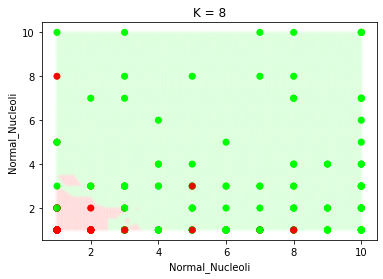

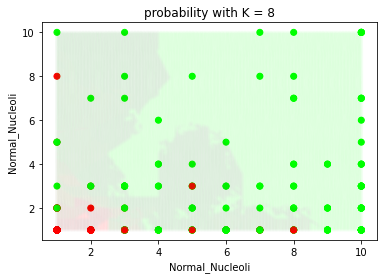

k with the max efficienty: the best k =  9


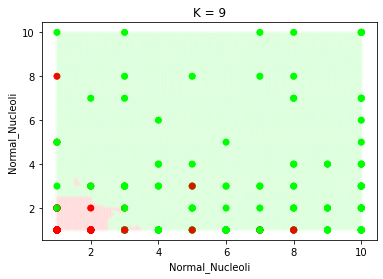

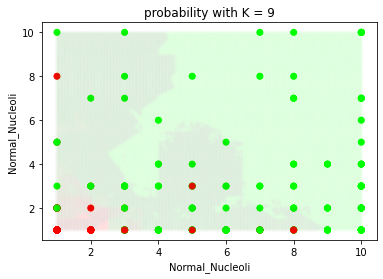

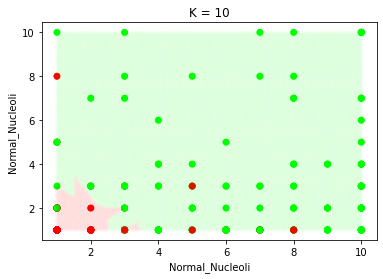

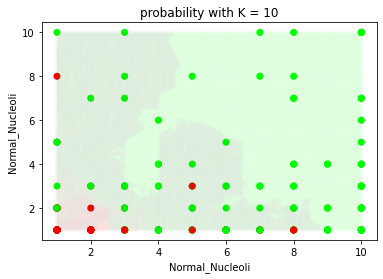

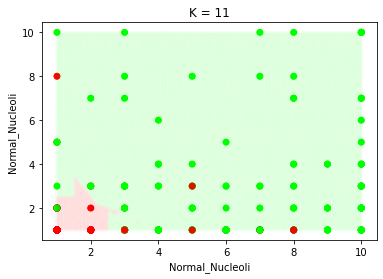

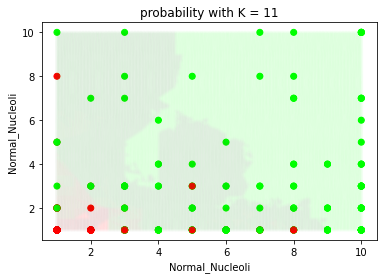

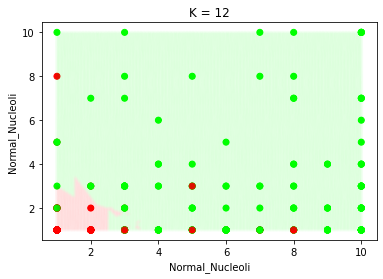

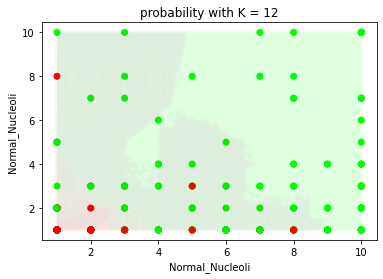

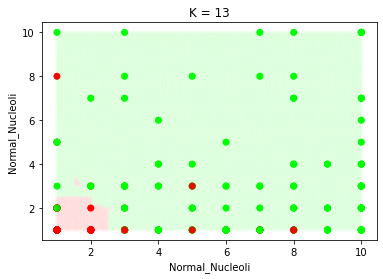

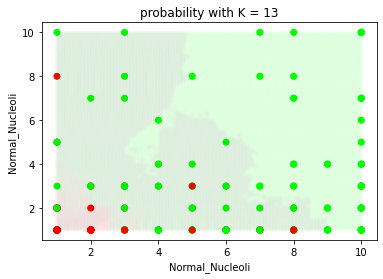

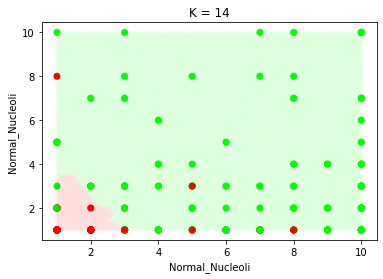

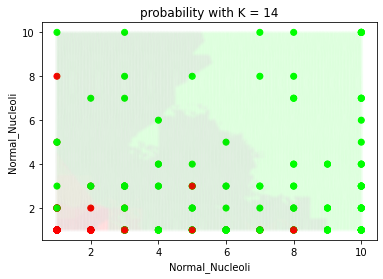

In [ ]:
#we can make the grid finer by increasing the number of samples from 200 to higher value
# Choosing the second and third column in the x matrix <============
x0v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x1v = np.linspace(np.min(x[:,2]), np.max(x[:,2]), 200)

#to features values as a mesh  
x0, x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

numK = 15
# fig, axs = plt.subplots(numK, 2, constrained_layout=True)
for k in range(1,numK):
  if k==best_K:
    print("k with the max efficienty: the best k = ", k)
  model = KNN(K=k)

  y_train_prob = np.zeros((y_train.shape[0], C))
  y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

  #to get class probability of all the points in the 2D grid
  y_prob_all, _ = model.fit(xPlot_train, y_train).predict(x_all)

  y_pred_all = np.zeros_like(y_prob_all)
  y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

  [a,b] = y_train_prob.shape
  y_train_prob_Color = np.zeros((a,b+1))
  y_train_prob_Color[:,:-1] = y_train_prob
  
  [a,b] = y_pred_all.shape
  y_pred_all_Color = np.zeros((a,b+1))
  y_pred_all_Color[:,:-1] = y_pred_all
  
  [a,b] = y_prob_all.shape
  y_prob_all_Color = np.zeros((a,b+1))
  y_prob_all_Color[:,:-1] = y_prob_all

  
  # axs[k,0].scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
  # axs[k,0].scatter(x_all[:,0], x_all[:,1], c=y_pred_all_Color, marker='.', alpha=0.01)
  # axs[k,0].set(xlabel=nameFeat1, ylabel=nameFeat1)
  # axs[k, 0].set_title("K = "+ str(k))

  plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_pred_all_Color, marker='.', alpha=0.01)
  plt.ylabel(nameFeat1)
  plt.xlabel(nameFeat1)
  plt.title("K = "+ str(k))
  plt.show()


  #We can also plot class probabilities (different values of probabilities take different colors)
  
  # axs[k,1].scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
  # axs[k,1].scatter(x_all[:,0], x_all[:,1], c=y_prob_all_Color, marker='.', alpha=.01)
  # axs[k,1].set(xlabel=nameFeat1, ylabel=nameFeat1)
  # axs[k, 1].set_title('probability with K = ' + str(k))
 
  
  plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
  plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_Color, marker='.', alpha=.01)
  plt.ylabel(nameFeat1)
  plt.xlabel(nameFeat1)
  plt.title('probability with K = ' + str(k))
  plt.show()


#Decision Tree#
Building the algorithm

In [ ]:
class Node:
    def __init__(self, data_indices, parent):
        self.data_indices = data_indices                    #stores the data indices which are in the region defined by this node
        self.left = None                                    #stores the left child of the node 
        self.right = None                                   #stores the right child of the node
        self.split_feature = None                           #the feature for split at this node
        self.split_value = None                             #the value of the feature for split at this node
        if parent:
            self.depth = parent.depth + 1                   #obtain the dept of the node by adding one to dept of the parent 
            self.num_classes = parent.num_classes           #copies the num classes from the parent 
            self.data = parent.data                         #copies the data from the parent
            self.labels = parent.labels                     #copies the labels from the parent
            class_prob = np.bincount(self.labels[data_indices], minlength=self.num_classes) #this is counting frequency of different labels in the region defined by this node
            self.class_prob = class_prob / np.sum(class_prob)  #stores the class probability for the node
            #note that we'll use the class probabilites of the leaf nodes for making predictions after the tree is built

"""## Greedy spliting of a node
Given a node, we consider all possible feature-value combinations for splitting the data. One such **test** that produces the lowest cost according to a supplied cost function (`cost_fn`) is returned.
"""

def greedy_test(node, cost_fn):
    #initialize the best parameter values
    best_cost = np.inf
    best_feature, best_value = None, None
    num_instances, num_features = node.data.shape
    #sort the features to get the test value candidates by taking the average of consecutive sorted feature values 
    data_sorted = np.sort(node.data[node.data_indices],axis=0)
    test_candidates = (data_sorted[1:] + data_sorted[:-1]) / 2.
    for f in range(num_features):
        #stores the data corresponding to the f-th feature
        data_f = node.data[node.data_indices, f]
        for test in test_candidates[:,f]:
            #Split the indices using the test value of f-th feature
            left_indices = node.data_indices[data_f <= test]
            right_indices = node.data_indices[data_f > test]
            #we can't have a split where a child has zero element
            #if this is true over all the test features and their test values  then the function returns the best cost as infinity
            if len(left_indices) == 0 or len(right_indices) == 0:                
                continue
            #compute the left and right cost based on the current split                                                         
            left_cost = cost_fn(node.labels[left_indices])
            right_cost = cost_fn(node.labels[right_indices])
            num_left, num_right = left_indices.shape[0], right_indices.shape[0]
            #get the combined cost using the weighted sum of left and right cost
            cost = (num_left * left_cost + num_right * right_cost)/num_instances
            #update only when a lower cost is encountered
            if cost < best_cost:
                best_cost = cost
                best_feature = f
                best_value = test
    return best_cost, best_feature, best_value

"""## Cost functions

Below we implement two cost functions corresponding to misclassification rate and entropy.
"""

#computes misclassification cost by subtracting the maximum probability of any class
def cost_misclassification(labels):
    counts = np.bincount(labels) 
    class_probs = counts / np.sum(counts)
    #you could compress both the steps above by doing class_probs = np.bincount(labels) / len(labels)
    return 1 - np.max(class_probs)

#computes entropy of the labels by computing the class probabilities
def cost_entropy(labels):
    class_probs = np.bincount(labels) / len(labels)
    class_probs = class_probs[class_probs > 0]              #this steps is remove 0 probabilities for removing numerical issues while computing log
    return -np.sum(class_probs * np.log(class_probs))       #expression for entropy -\sigma p(x)log[p(x)]

#computes the gini index cost
def cost_gini_index(labels):
    class_probs = np.bincount(labels) / len(labels)
    return 1 - np.sum(np.square(class_probs))               #expression for gini index 1-\sigma p(x)^2

"""we are now ready to implement the classifier:

when to stop splitting?
1. if there are not enough points under the current node (`min_leaf_instances`)
2. if reached maximum depth (`max_depth`)
3. if the decrease in the cost is negligible (not implemented)
Below is the template for the class, next we implement `fit` and `predict` methods.
"""

class DecisionTree:
    def __init__(self, num_classes=None, max_depth=3, cost_fn=cost_misclassification, min_leaf_instances=1):
        self.max_depth = max_depth      #maximum dept for termination 
        self.root = None                #stores the root of the decision tree 
        self.cost_fn = cost_fn          #stores the cost function of the decision tree 
        self.num_classes = num_classes  #stores the total number of classes
        self.min_leaf_instances = min_leaf_instances  #minimum number of instances in a leaf for termination
        
    def fit(self, data, labels):
        pass                            #pass in python 3 means nothing happens and the method here is empty
    
    def predict(self, data_test):
        pass

"""## Fit
To fit the tree to the data, we call the `_fit_tree` method on the `root_node` of the tree. In this method the _best_ test (split) for the current node is found, and the method is recursively called on the left and right child. If the `max_depth` is reached or the number of instances under the current node is below `min_leaf_instances` the node is not split anymore, resulting in a leaf node.
"""

def fit(self, data, labels):
    self.data = data
    self.labels = labels
    if self.num_classes is None:
        self.num_classes = np.max(labels) + 1
    #below are initialization of the root of the decision tree
    self.root = Node(np.arange(data.shape[0]), None)
    self.root.data = data
    self.root.labels = labels
    self.root.num_classes = self.num_classes
    self.root.depth = 0
    #to recursively build the rest of the tree
    self._fit_tree(self.root)
    return self

def _fit_tree(self, node):
    #This gives the condition for termination of the recursion resulting in a leaf node
    if node.depth == self.max_depth or len(node.data_indices) <= self.min_leaf_instances:
        return
    #greedily select the best test by minimizing the cost
    cost, split_feature, split_value = greedy_test(node, self.cost_fn)
    #if the cost returned is infinity it means that it is not possible to split the node and hence terminate
    if np.isinf(cost):
        return
    #print(f'best feature: {split_feature}, value {split_value}, cost {cost}')
    #to get a boolean array suggesting which data indices corresponding to this node are in the left of the split
    test = node.data[node.data_indices,split_feature] <= split_value
    #store the split feature and value of the node
    node.split_feature = split_feature
    node.split_value = split_value
    #define new nodes which are going to be the left and right child of the present node
    left = Node(node.data_indices[test], node)
    right = Node(node.data_indices[np.logical_not(test)], node)
    #recursive call to the _fit_tree()
    self._fit_tree(left)
    self._fit_tree(right)
    #assign the left and right child to present child
    node.left = left
    node.right = right

DecisionTree.fit = fit
DecisionTree._fit_tree = _fit_tree

"""## New predictions
Given a new instance, starting from the `root` of the `DecisionTree` we check to see if the instance falls in the left or right split, and repeat the process with left or right node depending on the test, until we reach a leaf node. The class probabilities of the training data under the leaf is returned.
"""

def predict(self, data_test):
    class_probs = np.zeros((data_test.shape[0], self.num_classes))
    for n, x in enumerate(data_test):
        node = self.root
        #loop along the dept of the tree looking region where the present data sample fall in based on the split feature and value
        while node.left:
            if x[node.split_feature] <= node.split_value:
                node = node.left
            else:
                node = node.right
        #the loop terminates when you reach a leaf of the tree and the class probability of that node is taken for prediction
        class_probs[n,:] = node.class_prob
    return class_probs

DecisionTree.predict = predict

###Finding the best Depth using 2 approches###
#####First: Cross validation#####
Second: Graphing accuracy over various depth




Using Cross Validation method to find the optimum depth for the tree

First we re-install some of the arrays we were manipulated before

In [ ]:
#print the feature shape and classes of dataset 
(N,D), C = x.shape, np.max(y)+1
print(f'instances (N) \t {N} \n features (D) \t {D} \n classes (C) \t {C}')
num_instances = N

#define a function for the MSE loss
loss = lambda y, yh: np.mean((y-yh)**2)

#Set the validation and test set
divider = 10
n_test, n_valid = num_instances // divider, num_instances // divider
#permute the data
inds = np.random.permutation(num_instances)
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_valid, y_valid = x[inds[n_test:n_test+n_valid]], y[inds[n_test:n_test+n_valid]]
x_train, y_train = x[inds[n_test+n_valid:]], y[inds[n_test+n_valid:]]          

instances (N) 	 683 
 features (D) 	 9 
 classes (C) 	 2


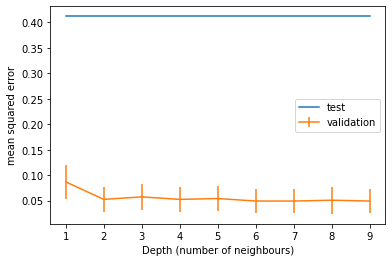

The simplest model with lowest validation error: Depth =  6


In [ ]:
#Plot the mean square error for different Depth values stored in D_list
D_list = range(1,10)
err_train, err_test, err_valid = [], [], []

########################################
inds = np.random.permutation(num_instances)
#seperate the test data
x_test, y_test = x[inds[:n_test]], y[inds[:n_test]]
x_rest, y_rest = x[inds[n_test:]], y[inds[n_test:]]
#rest for training and validation
n_rest = num_instances - n_test
########################################
num_folds = 10
err_test, err_valid = np.zeros(len(D_list)), np.zeros((len(D_list), num_folds))
for i, D in enumerate(D_list):
    #Find the validation errors for num_folds splits for a given K
    for f, (tr, val) in enumerate(cross_validate(n_rest, num_folds)):
        tree = DecisionTree(max_depth=D,cost_fn=cost_gini_index)
        y_prob_rest = tree.fit(x_rest[tr], y_rest[tr]).predict(x_rest[val])
        y_pred_rest = np.argmax(y_prob_rest,axis=-1)
        err_valid[i, f] = loss(y_rest[val], y_pred_rest)

    #this is the part that we don't do in a usual setup. We don't touch the test set until the very end. 
    tree = DecisionTree(max_depth=D,cost_fn=cost_gini_index)
    y_prob_rest = tree.fit(x_rest, y_rest).predict(x_test)
    y_pred_rest = np.argmax(y_prob_rest,axis=-1)
    err_test[i]= loss(y_test, y_pred_test)
    
plt.plot(D_list, err_test,  label='test')
plt.errorbar(D_list, np.mean(err_valid, axis=1), np.std(err_valid, axis=1), label='validation')
plt.legend()
plt.xlabel('Depth (number of neighbours)')
plt.ylabel('mean squared error')
plt.show()

# finding the best K for the model
validErrors = np.mean(err_valid, axis=1)
minDs = np.where(validErrors==min(validErrors))
print("The simplest model with lowest validation error: Depth = ", minDs[0][0]+1)
# we add one because the indexes start from 0
best_D = minDs[0][0]+1

###Finding the accuracy across different depth###

Text(0.5, 1.0, 'Maximum Accuracy over test set = 5')

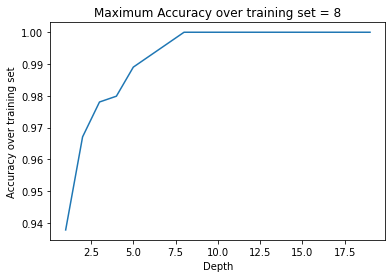

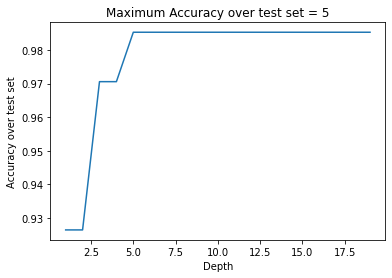

In [ ]:
#calculating accuracy accros different K values
accTrain = []
accTest = []
DMaxAccTrain = 0
DMaxTrain = 0
DMaxAccTest = 0
DMaxTest = 0

maximumRange = 20
for D in range(1,maximumRange):
  tree = DecisionTree(max_depth=D,cost_fn=cost_gini_index)

  probs_train = tree.fit(x_train, y_train).predict(x_train)
  y_pred = np.argmax(probs_train,1)
  accuracyTrain = evaluate_acc(y_pred, y_train)
  
  probs_test = tree.fit(x_train, y_train).predict(x_test)
  y_pred = np.argmax(probs_test,1)
  accuracyTest = evaluate_acc(y_pred, y_test)
  
  accTrain.append(accuracyTrain)
  accTest.append(accuracyTest)
  
  if DMaxAccTrain<accuracyTrain:
      DMaxAccTrain = accuracyTrain
      DMaxTrain = D
  if DMaxAccTest<accuracyTest:
      DMaxAccTest = accuracyTest
      DMaxTest = D

plt.figure(1)
plt.plot(range(1,maximumRange), accTrain)
plt.xlabel('Depth')
plt.ylabel('Accuracy over training set')
plt.title("Maximum Accuracy over training set = " + str(DMaxTrain))

plt.figure(2)
plt.plot(range(1,maximumRange), accTest)
plt.xlabel('Depth')
plt.ylabel('Accuracy over test set')
plt.title("Maximum Accuracy over test set = " + str(DMaxTest))

We can see that we get the maximum accuracy over test set with depth = 5, which confirms our previous finding from the cross validation

##Running the experiment with Decision Three Algorithm using the optimum depth##

Decision Tree with mis classification cost function




In [ ]:
tree = DecisionTree(max_depth=best_D,cost_fn=cost_misclassification)
probs_train = tree.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(probs_train,1)
accuracyTrain = evaluate_acc(y_pred, y_train)
print(f'accuracy for optimum depth and misclassification cost function over training dataset is {accuracyTrain*100:.1f}.')

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracyTest = evaluate_acc(y_pred, y_test)
print(f'accuracy for optimum depth and misclassification cost function over test dataset is {accuracyTest*100:.1f}.')

accuracy for optimum depth and misclassification cost function over training dataset is 98.7.
accuracy for optimum depth and misclassification cost function over test dataset is 95.6.


Decision Tree with mis Entropy cost function

In [ ]:
tree = DecisionTree(max_depth=best_D,cost_fn=cost_entropy)
probs_train = tree.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(probs_train,1)
accuracyTrain = evaluate_acc(y_pred, y_train)
print(f'accuracy for optimum depth and entropy cost function over training dataset is {accuracyTrain*100:.1f}.')

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracyTest = evaluate_acc(y_pred, y_test)
print(f'accuracy for optimum depth and entropy cost function over test dataset is {accuracyTest*100:.1f}.')

accuracy for optimum depth and entropy cost function over training dataset is 99.3.
accuracy for optimum depth and entropy cost function over test dataset is 94.1.


Decision Tree with mis Gini cost function


In [ ]:
tree = DecisionTree(max_depth=best_D,cost_fn=cost_gini_index)
probs_train = tree.fit(x_train, y_train).predict(x_train)
y_pred = np.argmax(probs_train,1)
accuracyTrain = evaluate_acc(y_pred, y_train)
print(f'accuracy for optimum depth and Gini cost function over training dataset is {accuracyTrain*100:.1f}.')

probs_test = tree.fit(x_train, y_train).predict(x_test)
y_pred = np.argmax(probs_test,1)
accuracyTest = evaluate_acc(y_pred, y_test)
print(f'accuracy for optimum depth and Gini cost function over test dataset is {accuracyTest*100:.1f}.')

accuracy for optimum depth and Gini cost function over training dataset is 99.3.
accuracy for optimum depth and Gini cost function over test dataset is 98.5.


###Visualization of Gini Function on the features choosen from correlation tests###

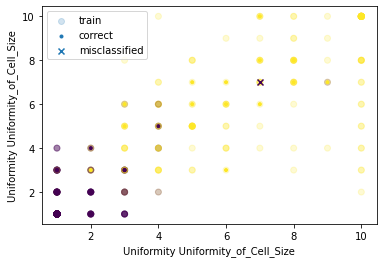

In [ ]:
#boolean array to later slice the indexes of correct and incorrect predictions
correct = y_test == y_pred
incorrect = np.logical_not(correct)
#visualization of the data
feat1 = 1
feat2 = 2
nameFeat1 = "Uniformity Uniformity_of_Cell_Size"
nameFeat2 = "Uniformity_of_Cell_Shape"
xPlot_train = x_train[:,[feat1,feat2]]
xPlot_test = x_test[:,[feat1,feat2]]

plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train, marker='o', alpha=.2, label='train')
plt.scatter(xPlot_test[correct,0], xPlot_test[correct,1], marker='.', c=y_pred[correct], label='correct')
plt.scatter(xPlot_test[incorrect,0], xPlot_test[incorrect,1], marker='x', c=y_test[incorrect], label='misclassified')
plt.legend()
plt.ylabel(nameFeat1)
plt.xlabel(nameFeat1)
plt.show()

Decision Boundry

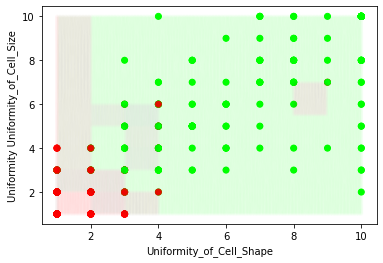

In [ ]:
x0v = np.linspace(np.min(x[:,1]), np.max(x[:,1]), 200)
x1v = np.linspace(np.min(x[:,2]), np.max(x[:,2]), 200)
x0,x1 = np.meshgrid(x0v, x1v)
x_all = np.vstack((x0.ravel(),x1.ravel())).T

tree = DecisionTree(max_depth=best_D, cost_fn=cost_gini_index)
y_train_prob = np.zeros((y_train.shape[0], C))
y_train_prob[np.arange(y_train.shape[0]), y_train] = 1

y_prob_all = tree.fit(xPlot_train, y_train).predict(x_all)

y_pred_all = np.zeros_like(y_prob_all)
y_pred_all[np.arange(x_all.shape[0]), np.argmax(y_prob_all, axis=-1)] = 1

[a,b] = y_train_prob.shape
y_train_prob_Color = np.zeros((a,b+1))
y_train_prob_Color[:,:-1] = y_train_prob
  
[a,b] = y_pred_all.shape
y_pred_all_Color = np.zeros((a,b+1))
y_pred_all_Color[:,:-1] = y_pred_all
  
[a,b] = y_prob_all.shape
y_prob_all_Color = np.zeros((a,b+1))
y_prob_all_Color[:,:-1] = y_prob_all

plt.scatter(xPlot_train[:,0], xPlot_train[:,1], c=y_train_prob_Color, marker='o', alpha=1)
plt.scatter(x_all[:,0], x_all[:,1], c=y_prob_all_Color, marker='.', alpha=.01)
plt.ylabel(nameFeat1)
plt.xlabel(nameFeat2)
plt.show()